# 🚨 Anomaly Detection in Cloud Storage Access Logs
This project builds an anomaly detection system using Isolation Forest to identify abnormal access behavior in cloud storage systems like Backblaze.

## 📌 Objective
To detect suspicious activity such as unusually high usage or access from unexpected regions using simulated access log data.

## 📊 Feature List

In [1]:

import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


## 📦 Data Generation

In [2]:

project_title = "🚨 Anomaly Detection in Cloud Storage Access Logs"
project_objective = (
    "To build an anomaly detection system using Isolation Forest that identifies abnormal access behavior "
    "in cloud storage systems like Backblaze, based on real-world inspired features."
)
feature_list = [
    "login_hour", "login_day", "request_size_MB", "session_duration_min",
    "storage_used_MB", "api_call_count", "failed_login_ratio"
]


## ⚠️ Injecting Anomalies

In [3]:

np.random.seed(42)
random.seed(42)
num_users = 100
users = [f"user_{i}" for i in range(num_users)]
start_date = datetime(2025, 4, 1)
end_date = datetime(2025, 4, 8)
num_logs = 2000

def random_datetime(start, end):
    delta = end - start
    return start + timedelta(seconds=random.randint(0, int(delta.total_seconds())))

data = []
for _ in range(num_logs):
    user = random.choice(users)
    access_time = random_datetime(start_date, end_date)
    data.append([
        user, access_time, access_time.hour, access_time.weekday(),
        np.random.choice(['read', 'write', 'delete', 'list'], p=[0.5, 0.3, 0.1, 0.1]),
        abs(np.random.normal(loc=500, scale=200)),
        np.random.choice(['US', 'IN', 'DE', 'BR', 'JP'], p=[0.5, 0.2, 0.1, 0.1, 0.1]),
        abs(np.random.normal(loc=10, scale=5)),
        abs(np.random.normal(loc=20000, scale=5000)),
        np.random.poisson(30),
        np.random.beta(2, 10)
    ])

columns = [
    "user_id", "access_time", "login_hour", "login_day", "operation", "request_size_MB",
    "ip_location", "session_duration_min", "storage_used_MB", "api_call_count", "failed_login_ratio"
]
df = pd.DataFrame(data, columns=columns)
df.head()


,user_id,access_time,login_hour,login_day,operation,request_size_MB,ip_location,session_duration_min,storage_used_MB,api_call_count,failed_login_ratio
0,user_81,2025-04-02 08:25:39,8,2,read,277.623976,US,11.594511,27896.064078,36,0.263885
1,user_3,2025-04-04 08:06:29,8,4,read,315.183432,US,4.935844,21571.236663,26,0.327060
2,user_31,2025-04-03 17:00:53,17,3,write,524.443833,US,7.422822,16996.806550,33,0.139912
3,user_17,2025-04-02 05:51:13,5,2,read,498.894428,IN,11.044318,10201.649381,31,0.216035
4,user_86,2025-04-07 14:50:58,14,0,read,298.182931,US,2.083529,17696.806145,26,0.228734


## 🛠️ Model Training

In [4]:

anomalies = []
for i in range(10):
    user = f"user_{random.randint(0, num_users-1)}"
    for _ in range(3):
        access_time = random_datetime(start_date, end_date)
        anomalies.append([
            user, access_time, access_time.hour, access_time.weekday(), 
            'delete', 10000, 'RU', 60, 100000, 500, 0.9
        ])
anomaly_df = pd.DataFrame(anomalies, columns=columns)
df = pd.concat([df, anomaly_df], ignore_index=True)
df['is_anomaly'] = 0
df.loc[df.index[-len(anomaly_df):], 'is_anomaly'] = 1


## 📈 Metrics & Visualization

In [5]:

X = df[feature_list]
y = df['is_anomaly']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = IsolationForest(contamination=0.015, random_state=42)
df['predicted_anomaly'] = model.fit_predict(X_scaled)
df['predicted_anomaly'] = df['predicted_anomaly'].map({1: 0, -1: 1})


## 🧪 Test on Unseen Data

C:\Users\USER\AppData\Local\Temp\ipykernel_21084\2361222145.py:9: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


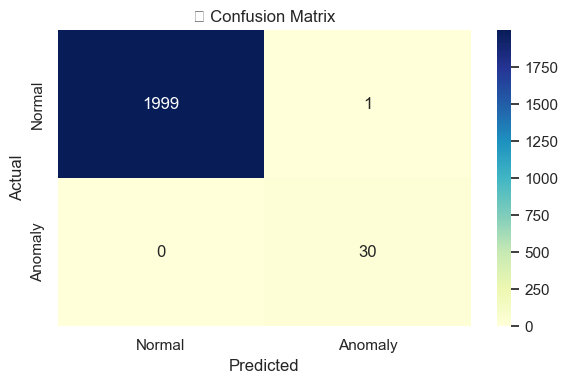

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       0.97      1.00      0.98        30

    accuracy                           1.00      2030
   macro avg       0.98      1.00      0.99      2030
weighted avg       1.00      1.00      1.00      2030



In [6]:

cm = confusion_matrix(y, df['predicted_anomaly'])
report = classification_report(y, df['predicted_anomaly'], output_dict=True)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title("🔍 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

print(classification_report(y, df['predicted_anomaly']))


## 💾 Export Anomalies

In [7]:

unseen_data = []
for _ in range(10):
    unseen_data.append([
        random.randint(0, 23), random.randint(0, 6),
        abs(np.random.normal(loc=500, scale=200)),
        abs(np.random.normal(loc=10, scale=5)),
        abs(np.random.normal(loc=20000, scale=5000)),
        np.random.poisson(30), np.random.beta(2, 10)
    ])
unseen_data.append([3, 2, 10000, 60, 100000, 500, 0.9])  # Injected anomaly
unseen_df = pd.DataFrame(unseen_data, columns=feature_list)
unseen_scaled = scaler.transform(unseen_df)
unseen_df['predicted_anomaly'] = model.predict(unseen_scaled)
unseen_df['predicted_anomaly'] = unseen_df['predicted_anomaly'].map({1: 'Normal', -1: 'Anomaly'})
unseen_df


,login_hour,login_day,request_size_MB,session_duration_min,storage_used_MB,api_call_count,failed_login_ratio,predicted_anomaly
0,23,0,551.692035,8.367587,31558.046877,27,0.105619,Normal
1,17,0,235.299129,15.177825,21723.152523,20,0.167800,Normal
2,10,4,527.011141,14.696815,21716.851749,28,0.345756,Normal
3,19,3,744.634624,7.508678,25050.653572,28,0.167714,Normal
4,22,0,435.004281,15.975927,14035.519032,33,0.341012,Normal
5,13,5,577.444614,7.515505,22724.645941,37,0.400114,Normal
6,5,4,320.160781,15.521073,22801.809753,35,0.096033,Normal
7,13,1,886.346601,14.673741,21123.161579,27,0.087702,Normal
8,1,0,560.738519,17.930986,19791.601109,33,0.045445,Normal
9,10,1,544.411612,4.590271,15235.155832,29,0.093689,Normal


In [9]:
# Detecetd anomalies
anomalies_detected = df[df['predicted_anomaly'] == 1]
anomalies_detected

,user_id,access_time,login_hour,login_day,operation,request_size_MB,ip_location,session_duration_min,storage_used_MB,api_call_count,failed_login_ratio,is_anomaly,predicted_anomaly
544,user_98,2025-04-06 00:51:38,0,6,read,429.262848,IN,3.321217,30678.130506,36,0.546995,0,1
2000,user_90,2025-04-05 01:47:38,1,5,delete,10000.000000,RU,60.000000,100000.000000,500,0.900000,1,1
2001,user_90,2025-04-06 10:05:25,10,6,delete,10000.000000,RU,60.000000,100000.000000,500,0.900000,1,1
2002,user_90,2025-04-01 03:19:09,3,1,delete,10000.000000,RU,60.000000,100000.000000,500,0.900000,1,1
2003,user_33,2025-04-03 13:04:29,13,3,delete,10000.000000,RU,60.000000,100000.000000,500,0.900000,1,1
2004,user_33,2025-04-04 00:41:02,0,4,delete,10000.000000,RU,60.000000,100000.000000,500,0.900000,1,1
2005,user_33,2025-04-01 19:44:47,19,1,delete,10000.000000,RU,60.000000,100000.000000,500,0.900000,1,1
2006,user_44,2025-04-04 02:45:25,2,4,delete,10000.000000,RU,60.000000,100000.000000,500,0.900000,1,1
2007,user_44,2025-04-02 07:28:02,7,2,delete,10000.000000,RU,60.000000,100000.000000,500,0.900000,1,1
2008,user_44,2025-04-01 00:22:23,0,1,delete,10000.000000,RU,60.000000,100000.000000,500,0.900000,1,1


In [8]:


anomalies_detected.to_csv("detected_anomalies.csv", index=False)
print("Anomalies exported to 'detected_anomalies.csv'")


Anomalies exported to 'detected_anomalies.csv'
